<h1> <center>PyTorch</center> </h1>

A **tensor** is a generalization of matrices. A vector is 1-dim tensor, a matrix is a 2-dim tensor, and RGB color image is an array with three indices, so it is 3-dim tensor. 

Table of Contents
1. [Single Layer Network](#single_layer_network) 
1. [Multi-Layer Network](#multi_layer_network)
1. [Numpy to Torch and Back](#numpy_to_torch_and_back) 
1. [Neural Networks with PyTorch](#neural_networks_with_pytorch)
1. [Building networks with PyTorch from scratch](#building_networks_with_pytorch) 
    1. [Activation Functions](#activation_functions)  
    1. [Initializing weights and biases](#initializing_weights_and_biases)  
    1. [Forward Pass](#forward_pass)
1. [Building Networks using `nn.Sequential`](#sequential)
1. [Model Training](#training)
    1. [Autograd](#autograd)
    1. [Loss and Autograd Together ](#loss_autograd)
    1. [Training the network](#training_network)
1. [Training For Real](#training_forreal)



In [1]:
# Firts, let's import PyTorch
import torch

In [2]:
def activation(x):
    '''Sigmoid activation fnc
    
    Parameters
    ----------
    x: torch.Tensor
    '''
    return 1 / (1 + torch.exp(-x))

<a id='single_layer_network'></a>
## 1. Single Layer Network

In [3]:
# Create some fake data 
torch.manual_seed(3) # set the random seed 

# tensors from a normal distribution 1row 5 cols
features = torch.randn((1,5))

# some weigths
weights = torch.randn_like(features)
bias = torch.randn((1,1))

Now, let us calculate the output of this single layered network. 

$$ y = f \left( \sum_i w_i X_i + b \right) $$
where f is the activation function, w is weights, and X is the features

In [4]:
y = activation(torch.sum(features * weights) + bias)
# y = activation((features * weights).sum() + bias)
y

tensor([[0.6220]])

The most efficient way to multiply tensors is using 
   1. **torch.mm** : prefer this one. More strict on the dimensions, if there is a problem yields an error 
   2. **torch.matmul** : supports broadcasting. tensors with weird shape might yield an output. 

You will check your tensors' shape a lot using **tensor.shape**. Reshaping methods are:
   1. **weights.reshape(a,b)** : the actual data in the memory will not be change, however sometimes instead it changes the original data 
   2. **weights.resize_(a,b)** : if you request more or less data than the original data your original data will loose some data 
   3. **weights.view(a,b)** : *TEHE BEST ONE.* returns (a,b) shape of the tensor without messing with the original one
   
Now, let s do the same calculation using matrix multiplication. 

In [5]:
print(features.shape)
print(weights.shape)

torch.Size([1, 5])
torch.Size([1, 5])


So we must reshape weights from (1,5) to (5,1). 

In [6]:
y = activation( torch.mm(features, weights.view(5,1)) + bias )
y

tensor([[0.6220]])

<a id='multi_layer_network'></a>
## 2. Multi-Layer Network

Now suppose we have n input layers and a hidden layer with 2 neurons, $h_1$ and $h_2$. 
We can find the output $h_1$ as 
$$ h_1 = f \left( \sum_i x_i w_{1i} + bias_1 \right) $$
Similarly, 
$$ h_2 = f \left( \sum_i x_i w_{2i} + bias_2 \right) $$
Or as a matrix multiplication, we can do the following 

$$ 
\vec{h} =  [h_1 h_2] = f \left( [x_1 x_2 \ldots x_n] \cdot \begin{bmatrix}
           w_{11}  & w_{21}\\
           w_{22}  & w_{22}\\
           \vdots  & \vdots \\
           w_{n1}  & w_{n2}
         \end{bmatrix} + Bias \right)
$$

Now let's create some fake data and calculate the output of a multi layer network with one hidden layer. 

<img src = "multilayer_network.png" style="width: 300px;"/>

In [7]:
# Create some fake data 
torch.manual_seed(3) # set the random seed 

# Create 3 features 
features = torch.randn((1,3)) 

# Number of neurons in layers: input, hidden, and output
n_input = features.shape[1] 
n_hidden = 2 
n_ouput = 2

# From input to hidden layer n_input x n_hidden
W1 = torch.randn(n_input, n_hidden)
B1 = torch.randn((1, n_hidden))

# From hidden layer to output n_hidden x n_ouput
W2 = torch.randn(n_hidden, n_ouput) 
B2 = torch.randn((1, n_ouput))

In [8]:
print('Shape of features: {}'.format(features.shape))
print('Shape of W1: {}'.format(W1.shape))
print('Shape of W2: {}'.format(W2.shape))

Shape of features: torch.Size([1, 3])
Shape of W1: torch.Size([3, 2])
Shape of W2: torch.Size([2, 2])


In [9]:
h = activation(torch.mm(features, W1) + B1)
output = activation(torch.mm(h, W2) + B2)
print(output)

tensor([[0.6958, 0.6643]])


The number of hidden units parameters of the network is hyperparameter.
<a id='numpy_to_torch_and_back'></a>
## 3. Numpy to Torch and Back 

To convert to a numpy array to a tensor **torch.from_numpy()**
From a tensor to a numpy **.numpy()** 

The memory is shared between Numpy and Torch. So if you change one value the other one will be changed as well. 

In [10]:
tensor = torch.randn((3,5))
print(tensor) 
numpy = tensor.numpy()
print(numpy)
tensor_back = torch.from_numpy(numpy)
print(tensor_back)

tensor([[ 0.8157,  0.4952, -0.1643, -0.6780, -1.0591],
        [ 0.7477,  0.2389, -0.3922,  0.1519, -1.1837],
        [ 0.5344, -1.4510, -0.6294,  0.1544, -0.2480]])
[[ 0.8156775   0.495189   -0.16431698 -0.6779622  -1.0591074 ]
 [ 0.74769664  0.23891741 -0.39215022  0.1519149  -1.1837332 ]
 [ 0.5343607  -1.4510227  -0.629374    0.1544151  -0.24799016]]
tensor([[ 0.8157,  0.4952, -0.1643, -0.6780, -1.0591],
        [ 0.7477,  0.2389, -0.3922,  0.1519, -1.1837],
        [ 0.5344, -1.4510, -0.6294,  0.1544, -0.2480]])


<a id='neural_networks_with_pytorch'></a>
## 4. Neural Networks with PyTorch 

PyTorch has a nice module **nn** that provides an efficient way of building large neural networks. 

To do that we will use MNIST image dataset, which consists of grayscale handwritten digits, we will try to predict. Each image is 28x28 pixels. 

First off, let's load the dataset through torchvision.

In [11]:
# import some necessary packages 
%matplotlib inline

# import torch (we have imported it at the beginning)
import numpy as np
import matplotlib.pyplot as plt 

In [12]:
from torchvision import datasets, transforms # conda install torchvision -c soumith to install torchvision (Windows, conda) 
# Define a transofmration to normalize data 
transform = transforms.Compose ([transforms.ToTensor(), 
                                transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5))
                                ])

# Download and load the train data
train_set = datasets.MNIST('MNIST_data/train/', download = True, train = True, transform = transform) 
trainloader = torch.utils.data.DataLoader(train_set, batch_size = 64, shuffle = True)

# Download and load the test data
test_set = datasets.MNIST('MNIST_data/test/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=True)

We load the data into generators, trainloader and testloader. We will turn them into iterator. Or we can use for loop and loop through the generator. Since we chose **batch_size=64**, the images below are just a tensor with size **(64, 1, 28, 28)**. In other words, we have 64 of 1 color channel and 28x28 pixel images images per batch. 

In [13]:
dataiter = iter(trainloader)
images,  labels = dataiter.next() 

print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


How does an image look like?

The image below is labeled as a "2".


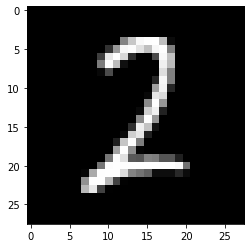

In [14]:
plt.imshow(images[1].numpy().squeeze(), cmap = 'Greys_r'); 
print('The image below is labeled as a "{}".'.format(labels[1]))

Now, let's build a neural network for this dataset using weight matrices and matrix multiplication. Then we will do it with PyTorch's **nn** module. 

For this exersice we will build a *Dense* (*fully-connected*) network. In a dense network, wach unit in one layer is connected to each unit in the next layer. In fully-connected networks, the input to each layer must be a one-dimensional vector. However, our images are 28x28 2D tensors, so we need to convert them into 1D vectors. Thinking about sizes, we need to convert the batch of images with shape (64, 1, 28, 28) to a have a shape of (64, 784), where 28x28 = 784. This is typically called flattening, we flattened the 2D images into 1D vectors.

Moreover, unlike above where we had only one output unit in the output layer, here we need 10 output units, one for each digit. We want our network to predict the digit shown in an image, so what we'll do is calculate probabilities that the image is of any one digit or class. This ends up being a discrete probability distribution over the classes (digits) that tells us the most likely class for the image. That means we need 10 output units for the 10 classes (digits). 

    Exercise: Flatten the batch of images images. Then build a multi-layer network with 784 input units, 256 hidden units, and 10 output units using random tensors for the weights and biases. For now, use a sigmoid activation for the hidden layer. Leave the output layer without an activation, we'll add one that gives us a probability distribution next.

In [15]:
# define the activation function (for now stick to sigmoid activation function)

def activation(x):
    return 1/(1+torch.exp(-x))

# flatten the input
inputs = images.view(images.shape[0], -1) 
# -1 handles the remaning part so we do not need to calculate it. Here we preserve 
# 64, the number of the observations and flatten the (1,28,28) part to (784) 

# create weights and biases
# from input to hidden layer
w1 = torch.randn(784,256)
b1 = torch.randn(256)

# from hidden to output 
w2 = torch.randn(256, 10)
b2 = torch.randn(10) 

h = activation( torch.mm(inputs, w1) + b1 ) # the outputs of the neurons in the hidden layer 

output = torch.mm(h, w2) + b2 

We do want our network to tell us the probabilities of an image belonging to a class of digit. In other words, we want it to result in a probability distribution. However, this one yields the following 

In [16]:
output

tensor([[ 1.3595e+01, -1.2531e+01,  2.4790e+00,  1.3937e+01, -2.8479e+00,
          3.3568e+00, -1.5519e+01, -4.7815e+00,  1.2554e+01,  6.8631e-01],
        [ 1.3518e+00, -1.8978e+01,  1.2984e+00,  1.0550e+01, -9.7840e+00,
          3.4710e+00, -1.5515e+01, -4.4512e+00,  1.4810e+00,  3.9936e+00],
        [ 2.5064e+00, -3.4271e+00,  5.1454e-01,  1.6956e+01, -3.7287e+00,
         -4.1507e+00, -1.1961e+01,  4.1959e+00,  8.1844e+00,  2.5714e+00],
        [ 6.0296e+00, -2.4710e+00,  7.0680e+00,  1.3004e+01, -4.5006e+00,
         -9.9589e+00, -1.5161e+01, -1.5491e+01,  2.8066e+00,  3.2765e+00],
        [ 3.1348e+00, -1.8122e+01,  1.3104e-02,  1.0954e+01, -1.3886e+01,
         -4.0207e+00, -1.9049e+01, -8.7065e+00,  6.4909e+00, -3.0754e+00],
        [ 1.7263e+01, -9.6313e+00,  6.4363e+00,  1.4939e+00,  3.0854e+00,
         -6.6790e+00, -2.1263e+01, -8.2607e+00,  6.8088e-02, -8.5216e+00],
        [ 3.3808e+00, -5.9131e+00,  2.6405e+00,  7.0298e+00, -5.5683e+00,
         -9.1513e+00, -2.2089e+0

So, we want to convert these values into a probability distribution. For this we use [softmax](https://en.wikipedia.org/wiki/Softmax_function) function.  It looks like
$$ \sigma(x_i) = \frac{e^{x_i}}{\sum_{k} e^{x_k}}$$ 

    Exercise: Implement a function softmax that performs the softmax calculation and returns probability distributions for each example in the batch. 

In [17]:
def softmax(x):
    '''
    Note that you'll need to pay attention to the shapes when doing this. If you have a tensor a with 
    shape (64, 10) and a tensor b with shape (64,), doing a/b will give you an error because PyTorch 
    will try to do the division across the columns (called broadcasting) but you'll get a size mismatch. 
    The way to think about this is for each of the 64 examples, you only want to divide by one value, 
    the sum in the denominator. So you need b to have a shape of (64, 1). This way PyTorch will divide 
    the 10 values in each row of a by the one value in each row of b. Pay attention to how you take 
    the sum as well. You'll need to define the dim keyword in torch.sum. Setting dim=0 takes the sum 
    across the rows while dim=1 takes the sum across the columns.
    '''
    return torch.exp(x) / torch.sum(torch.exp(x), dim=1).view(-1, 1)

output_probs = softmax(output) 
# Check that it has the sahpe (64, 10)
print(output_probs.shape)
# Check that the probs add up to 1
print(output_probs.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


<a id='building_networks_with_pytorch'></a>
## 5. Building networks with PyTorch from scratch

Now we will build the same neural network with PyTorch's **nn** module. 

In [18]:
from torch import nn

class Network(nn.Module):
    def __init__(self):
        super().__init__() 
        
        # We have one hidden layer and one output layer.
        # hidden layer takes 784 inputs and outputs 256
        self.hidden = nn.Linear(784, 256)
        # output layer takes these 256 inputs and results in 10 
        self.output = nn.Linear(256, 10)
        
        # Define sigmoid activation and softmax output 
        self.sigmoid = nn.Sigmoid()
        # At the end of the network, we want probability distributions, so we use softmax 
        self.softmax = nn.Softmax(dim=1)        

    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x


(The following is from the lecture note) 

Let's go through this bit by bit.

```python
class Network(nn.Module):
```

Here we're inheriting from `nn.Module`. Combined with `super().__init__()` this creates a class that tracks the architecture and provides a lot of useful methods and attributes. It is mandatory to inherit from `nn.Module` when you're creating a class for your network. The name of the class itself can be anything.

```python
self.hidden = nn.Linear(784, 256)
```

This line creates a module for a linear transformation, $x\mathbf{W} + b$, with 784 inputs and 256 outputs and assigns it to `self.hidden`. The module automatically creates the weight and bias tensors which we'll use in the `forward` method. You can access the weight and bias tensors once the network (`net`) is created with `net.hidden.weight` and `net.hidden.bias`.

```python
self.output = nn.Linear(256, 10)
```

Similarly, this creates another linear transformation with 256 inputs and 10 outputs.

```python
self.sigmoid = nn.Sigmoid()
self.softmax = nn.Softmax(dim=1)
```

Here I defined operations for the sigmoid activation and softmax output. Setting `dim=1` in `nn.Softmax(dim=1)` calculates softmax across the columns.

```python
def forward(self, x):
```

PyTorch networks created with `nn.Module` must have a `forward` method defined. It takes in a tensor `x` and passes it through the operations you defined in the `__init__` method.

```python
x = self.hidden(x)
x = self.sigmoid(x)
x = self.output(x)
x = self.softmax(x)
```

Here the input tensor `x` is passed through each operation a reassigned to `x`. We can see that the input tensor goes through the hidden layer, then a sigmoid function, then the output layer, and finally the softmax function. It doesn't matter what you name the variables here, as long as the inputs and outputs of the operations match the network architecture you want to build. The order in which you define things in the `__init__` method doesn't matter, but you'll need to sequence the operations correctly in the `forward` method.

Now we can create a `Network` object.

In [19]:
# Create the network and look at it's representation
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

We can clean the code further by using `torch.nn.functional` module to combine layers with the activation functions.

In [20]:
import torch.nn.functional as F
from torch import nn

class Network(nn.Module):
    def __init__(self):
        super().__init__() 
        # input to hidden : 784 to 256
        self.hidden = nn.Linear(784, 256)
        # hidden to output : 256 to 10
        self.output = nn.Linear(256, 10)

    def forward(self, x):
        # hidden layer with sigmoid activation function
        x = F.sigmoid(self.hidden(x))
        # ouput layer with sogtmax activation function
        x = F.softmax(self.output(x), dim=1)
        
        return x

<a id='activation_functions'></a>
### 5.A. Activation Functions 

A function can pass as an activation functions as long as it is not linear. Some common activation functions are Sigmoid, ReLU (rectified linear unit), and Tanh (hyperbolic tangent). 

In practice, the ReLU is used almost exclusively as the activation function for hidden layers, mainly because it is computationally light. 

    Exercise: Create a network with 784 input units, a hidden layer with 128 units and a ReLU activation, then a hidden layer with 64 units and a ReLU activation, and finally an output layer with a softmax activation. You can use  ReLU activation with the nn.ReLU module or F.relu function. 

In [21]:
from torch import nn 
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # from input to first hidden: 784 to 128
        self.fc1 = nn.Linear(784, 128)
        # from first hidden to second hidden: 128 to 64 
        self.fc2 = nn.Linear(128, 64)
        # from second hidden to output: 64  to 10
        self.fc3 = nn.Linear(64, 10)
    
    def forward(self, x): 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x), dim = 1)
        
        return x

model = Network()
print(model)
        

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


<a id='initializing_weights_and_biases'></a>
### 5.B. Initializing weights and biases

Even though `nn` module automatically initializes the weight, it is possible to customize the initialization. Weights and biases are tensors attached to the layer we define. We can get them with `model.fc1.weight`. You can customize bias and weights by `model.fc1.bias.data.fill_(0)` and `model.fc1.weight.data.normal_(std=0.01)`, for instance. 

In [22]:
print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
tensor([[-0.0167, -0.0088, -0.0015,  ..., -0.0038,  0.0165,  0.0287],
        [ 0.0120, -0.0334,  0.0285,  ...,  0.0128,  0.0206,  0.0316],
        [ 0.0028, -0.0170,  0.0043,  ...,  0.0135, -0.0126,  0.0049],
        ...,
        [-0.0030,  0.0010,  0.0116,  ..., -0.0191, -0.0356, -0.0038],
        [ 0.0075,  0.0167, -0.0202,  ...,  0.0094, -0.0067,  0.0044],
        [ 0.0092, -0.0278,  0.0349,  ...,  0.0299,  0.0196, -0.0037]],
       requires_grad=True)
Parameter containing:
tensor([ 0.0261,  0.0135, -0.0252,  0.0028, -0.0346, -0.0167, -0.0181,  0.0192,
        -0.0162,  0.0156, -0.0127,  0.0289, -0.0123, -0.0328, -0.0063, -0.0131,
        -0.0334, -0.0344, -0.0080, -0.0080, -0.0296, -0.0007,  0.0103, -0.0027,
        -0.0057,  0.0267,  0.0118, -0.0029, -0.0229,  0.0132,  0.0070,  0.0011,
         0.0192,  0.0342, -0.0333,  0.0197,  0.0153,  0.0090,  0.0188, -0.0305,
        -0.0039,  0.0084, -0.0124,  0.0297, -0.0283,  0.0132,  0.0203,  0.0325,
         0.0129

<a id='forward_pass'></a>
### 5.C. Forward Pass

Now that we have a built a network, let's see what happens when we pass an image

In [23]:
#From the iterator, get some other set of data 
dataiter = iter(trainloader)
images, labels = dataiter.next()

# remember, we use a flattened layer as the input layer. 
# So we must resize the images. 
images.resize_(64, 1, 784) 

# let's forward pass an image from out batch of 64
prob_dist = model.forward(images[0,:]) 

img = images[0] 

We have chosen the first image in our batch. below we plot this image along with the probability distribution that our network creates on possible outcomes by one forward pass. The function below, `image_and_probdistn()`, draws these two images. 

In [24]:
import matplotlib.cm as cm
def image_and_probdistn(image, prob_dist):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(img.view(1, 28, 28).numpy().squeeze(), cmap = 'Greys_r')
    ax1.set_title('Image')

    plt.sca(ax2)
    ax2.barh(np.arange(10), np.array(prob_dist.detach().numpy().tolist()[0]), align='center')
    ax2.set_xlim(0,1)
    ax2.set_yticks(np.arange(10))
    ax2.set_title('Class Probability.')

    plt.show()
    

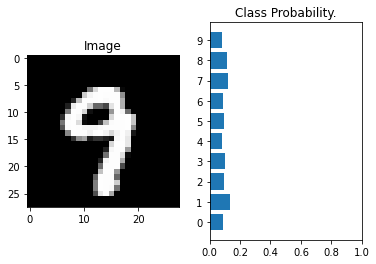

In [25]:
image_and_probdistn(img, prob_dist)

As seen above, the initial guess of the network is ambiguous. This is because we moved forward once with the initial weights. Later we will back-propogate our mistakes in order to improve our network's guess. 

<a id='sequential'></a>
## 6. Building Networks using `nn.Sequential` 

Another way of building the Network class is using `nn.Sequential`. We could have built the same network above by the code below. 

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


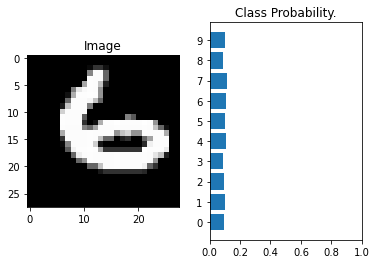

In [26]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.Softmax(dim=1))
print(model)

dataiter = iter(trainloader)
images, labels = dataiter.next()
images.resize_(64, 1, 784) 
prob_dist = model.forward(images[0,:]) 
img = images[0] 
image_and_probdistn(img, prob_dist)

<a id='training'></a>
## 7. Model Training

In order to optimize the process, we need to have an objective. That is to minimize the **loss function** (also called the cost) defined as 
$$
\large \ell = \frac{1}{2n}\sum_i^n{\left(y_i - \hat{y}_i\right)^2}
$$
where $n$ is the number of training examples, $y_i$ are the true labels, and $\hat{y}_i$ are the predicted labels. 
As usual, you may define a different loss function depending on your objective. 

Having a nice a convex function as our objective function, we can simply use the first order condition, or computationaly, Gradient Descent. Since we have multiple layers in the network when we move from the input to the output, we will be using the chain rule. Back propogation utilize it to update the weights.  

In [27]:
# Define the same model witout the softmax step. 
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10))

# Define the loss 
criterion = nn.CrossEntropyLoss()

# Get the data 
images, labels = next(iter(trainloader))

# Flatten images 
images = images.view([images.shape[0], -1])

# Forward pass, get the logits
logits = model(images) 

# Calculate the loss 
loss = criterion(logits, labels) 

print('The loss is %f' % loss)

The loss is 2.301328


    Exercise: Now let;s build a model with the log-softmax output by using `nn.LofSoftMax` or `F.log_softmax`. Then you can get the actual probabilites by taking the exponential `torch.exp(output)`. With a log-softmax output, you want to use the negative log likelihood loss, `nn.NLLLoss`

In [28]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(), 
                      nn.Linear(128, 64), 
                      nn.ReLU(), 
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1)
                     ) 
# define the loss
criterion = nn.NLLLoss() 

# get the data
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

# forward pass, get logits
log_probs = model(images)
# calculate the loss with the logits and the labels
loss = criterion(log_probs, labels)
print('The loss is %f' % loss)
print(loss) 

The loss is 2.280704
tensor(2.2807, grad_fn=<NllLossBackward>)


<a id='autograd'></a>
### 7.A. Autograd

PyTorch provides a module, `autograd`, for automatically calculating the gradients of tensors. 
Autograd works by keeping track of operations performed on tensors, then going backwards through those operations, calculating gradients along the way
You can turn off gradients for a block of code with the `torch.no_grad()` content:
```python
x = torch.zeros(1, requires_grad=True)
>>> with torch.no_grad():
...     y = x * 2
>>> y.requires_grad
False
```

In [29]:
# create a 2x2 tensor with gradient method on
x = torch.randn(2,2, requires_grad = True)
print(x) 

# square it and assign it to a new var y
y = x**2
print(y) 

print(y.grad_fn) 

z = y.mean() 
print(z)

tensor([[ 0.0276,  0.0181],
        [ 0.7817, -1.0574]], requires_grad=True)
tensor([[7.6416e-04, 3.2865e-04],
        [6.1103e-01, 1.1181e+00]], grad_fn=<PowBackward0>)
tensor(0.4326, grad_fn=<MeanBackward0>)


To calculate the gradients, you need to run the `.backward` method on a Variable, `z` for example. This will calculate the gradient for `z` with respect to `x`

$$
\frac{\partial z}{\partial x} = \frac{\partial}{\partial x}\left[\frac{1}{n}\sum_i^n x_i^2\right] = \frac{x}{2}
$$

In [30]:
# without z.backward() x.grad is none
print(x.grad)

z.backward()
print(x.grad)
print(x/2)

None
tensor([[ 0.0138,  0.0091],
        [ 0.3908, -0.5287]])
tensor([[ 0.0138,  0.0091],
        [ 0.3908, -0.5287]], grad_fn=<DivBackward0>)


<a id='loss_autograd'></a>
### 7.B. Loss and Autograd Together 

PyTroch creates a network with all of the parameters being initialized with `requires_grad = True`. As a result, we can calculate `loss.backward()`. 

In [31]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(), 
                      nn.Linear(128, 64), 
                      nn.ReLU(), 
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1)
                     ) 
# define the loss
criterion = nn.NLLLoss() 

# get the data
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

# forward pass, get logits
log_probs = model(images)
# calculate the loss with the logits and the labels
loss = criterion(log_probs, labels)

In [32]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[-0.0003, -0.0003, -0.0003,  ..., -0.0003, -0.0003, -0.0003],
        [-0.0019, -0.0019, -0.0019,  ..., -0.0019, -0.0019, -0.0019],
        [-0.0014, -0.0014, -0.0014,  ..., -0.0014, -0.0014, -0.0014],
        ...,
        [ 0.0005,  0.0005,  0.0005,  ...,  0.0005,  0.0005,  0.0005],
        [ 0.0006,  0.0006,  0.0006,  ...,  0.0006,  0.0006,  0.0006],
        [ 0.0004,  0.0004,  0.0004,  ...,  0.0004,  0.0004,  0.0004]])


<a id='training_network'></a>
### 7.C. Training the network

Now we can train our network by optimizing the weights using the gradients for gradient descent.  To do this, we will use optimizers, which comes from PyTorch's `optim.SGD` package. 

In [33]:
from torch import optim 

# optimizers require the parameters to optimize and learning rate
optimizer = optim.SGD(model.parameters(), lr = 0.01)

Now we know how to use all the individual parts so it's time to see how they work together. Let's consider just one learning step before looping through all the data. The general process with PyTorch:

* Make a forward pass through the network 
* Use the network output to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

Below we go through one training step and print out the weights and gradients so you can see how it changes. 

    Note that there is a line of code `optimizer.zero_grad()`. When you do multiple backwards passes with the same parameters, the gradients are accumulated. This means that you need to zero the gradients on each training pass or you'll retain gradients from previous training batches.

In [34]:
print('Initial weights - ', model[0].weight)

# get the data
images, labels = next(iter(trainloader))

# flatten it
images.resize_(64,784)

# clear the gradients in order to avoid the accumulation
optimizer.zero_grad()

# forward pass, backward pass, update weights 
output = model(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Initial weights -  Parameter containing:
tensor([[ 0.0020, -0.0033,  0.0261,  ...,  0.0103, -0.0185,  0.0270],
        [ 0.0237, -0.0303, -0.0017,  ..., -0.0344,  0.0017, -0.0323],
        [ 0.0239,  0.0036, -0.0093,  ...,  0.0320, -0.0135, -0.0229],
        ...,
        [-0.0350,  0.0004,  0.0184,  ...,  0.0073, -0.0171, -0.0142],
        [-0.0081, -0.0022,  0.0276,  ..., -0.0188, -0.0340, -0.0062],
        [ 0.0259, -0.0312, -0.0056,  ..., -0.0129, -0.0133,  0.0129]],
       requires_grad=True)
Gradient - tensor([[ 0.0020,  0.0020,  0.0020,  ...,  0.0020,  0.0020,  0.0020],
        [-0.0010, -0.0010, -0.0010,  ..., -0.0010, -0.0010, -0.0010],
        [ 0.0029,  0.0029,  0.0029,  ...,  0.0029,  0.0029,  0.0029],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0026, -0.0026, -0.0026,  ..., -0.0026, -0.0026, -0.0026],
        [ 0.0066,  0.0066,  0.0066,  ...,  0.0066,  0.0066,  0.0066]])
Updated weights -  Parameter containing:
tensor([[ 0.

<a id='training_forreal'></a>
## 8. Training For Real

Now let's loop over the optimization process to update our weights in order to minimize the loss function. 

In [35]:
model = nn.Sequential(nn.Linear(784, 128),
                     nn.ReLU(), 
                     nn.Linear(128,64),
                     nn.ReLU(), 
                     nn.Linear(64,10), 
                     nn.LogSoftmax(dim = 1)
                     )

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.003)

epochs = 6
for e in range(epochs):
    # accumulate the losses as trainloader loads data 
    running_loss = 0
    for images, labels in trainloader:
        # flatten the images
        images = images.view(images.shape[0], -1)
        
        # do not forget to skip this step
        optimizer.zero_grad()
        # forward pass, calculate the loss, backward pass, take a step
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        # addup the losses
        running_loss += loss.item()
    else:
        print(f" Epoch {e+1} - Training loss: {running_loss/len(trainloader)}")


 Epoch 1 - Training loss: 1.916575224033551
 Epoch 2 - Training loss: 0.8912317223195583
 Epoch 3 - Training loss: 0.542008754302825
 Epoch 4 - Training loss: 0.4363247998424176
 Epoch 5 - Training loss: 0.38851464018702253
 Epoch 6 - Training loss: 0.36104277241776495


Now that we have trained the model, it is time to check its predcitions. 

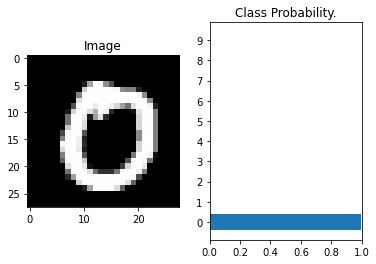

In [36]:
images, labels = next(iter(testloader))

img = images[0].view(1, 784)
with torch.no_grad():
    log_probs = model(img)
logits =torch.exp(log_probs)
    

image_and_probdistn(img, logits)


We have build a wonderful neural network that can accurately predict the digits in mnist dataset.